In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
import requests
import json
import numpy as np
import pandas as pd
import streamlit as st 

In [2]:


# Make Strava auth API call with your 
# client_code, client_secret and code
response = requests.post(
                    url = 'https://www.strava.com/oauth/token',
                    data = {
                            'client_id':,
                            'client_secret': '',
                            'code': '',
                            'grant_type': 'authorization_code'
                            }
                )
#Save json response as a variable
strava_tokens = response.json()
# Save tokens to file
with open('strava_tokens.json', 'w') as outfile:
    json.dump(strava_tokens, outfile)
# Open JSON file and print the file contents 
# to check it's worked properly
with open('strava_tokens.json') as check:
  data = json.load(check)
print(data)

{'token_type': 'Bearer', 'expires_at': 1659642057, 'expires_in': 21355, 'refresh_token': '4f04a973324c10c502b4deb1745a58f5d1b4013f', 'access_token': '8a57531bdc61e1115027ae65c9dd198e2a5c32cd', 'athlete': {'id': 4161085, 'username': 'thiago_deoliveira', 'resource_state': 2, 'firstname': 'Thiago', 'lastname': 'Oliveira', 'bio': '', 'city': '', 'state': '', 'country': None, 'sex': None, 'premium': False, 'summit': False, 'created_at': '2014-03-16T17:48:29Z', 'updated_at': '2020-04-26T16:03:29Z', 'badge_type_id': 0, 'weight': 0.0, 'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/4161085/18561766/1/medium.jpg', 'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/4161085/18561766/1/large.jpg', 'friend': None, 'follower': None}}


In [3]:
from pandas.io.json import json_normalize
import csv
# Get the tokens from file to connect to Strava
with open('strava_tokens.json') as json_file:
    strava_tokens = json.load(json_file)
# Loop through all activities
url = "https://www.strava.com/api/v3/activities"
access_token = strava_tokens['access_token']
# Get first page of activities from Strava with all fields
r = requests.get(url + '?access_token=' + access_token)
r = r.json()


    
df = json_normalize(r)
df.to_csv('strava_activities_all_fields.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


In [4]:
# Get the tokens from file to connect to Strava
with open('strava_tokens.json') as json_file:
    strava_tokens = json.load(json_file)
# Loop through all activities
page = 1
url = "https://www.strava.com/api/v3/activities"
access_token = strava_tokens['access_token']
# Create the dataframe ready for the API call to store your activity data
activities = pd.DataFrame(
    columns = [
            "id",
            "name",
            "start_date_local",
            "type",
            "distance",
            "moving_time",
            "elapsed_time",
            "total_elevation_gain",
            "start_latlng",
            "end_latlng",
            "external_id",
            "average_speed",
            "max_speed", 
            "kudos_count"
            
            
    ]
)
while True:
    
    # get page of activities from Strava
    r = requests.get(url + '?access_token=' + access_token + '&per_page=200' + '&page=' + str(page))
    r = r.json()
    
    # if no results then exit loop
    if (not r):
        break
    
    # otherwise add new data to dataframe
    for x in range(len(r)):
        activities.loc[x + (page-1)*200,'id'] = r[x]['id']
        activities.loc[x + (page-1)*200,'name'] = r[x]['name']
        activities.loc[x + (page-1)*200,'start_date_local'] = r[x]['start_date_local']
        activities.loc[x + (page-1)*200,'type'] = r[x]['type']
        activities.loc[x + (page-1)*200,'distance'] = r[x]['distance']
        activities.loc[x + (page-1)*200,'moving_time'] = r[x]['moving_time']
        activities.loc[x + (page-1)*200,'elapsed_time'] = r[x]['elapsed_time']
        activities.loc[x + (page-1)*200,'total_elevation_gain'] = r[x]['total_elevation_gain']
        activities.loc[x + (page-1)*200,'start_latlng'] = r[x]['start_latlng']
        activities.loc[x + (page-1)*200,'end_latlng'] = r[x]['end_latlng']

        activities.loc[x + (page-1)*200,'external_id'] = r[x]['external_id']
        activities.loc[x + (page-1)*200,'average_speed'] = r[x]['average_speed']
        activities.loc[x + (page-1)*200,'max_speed'] = r[x]['max_speed']
        activities.loc[x + (page-1)*200,'kudos_count'] = r[x]['kudos_count']
        
          
                    
        

    # increment page
    page += 1
# Export your activities file as a csv 
# to the folder you're running this script in
activities.to_csv('strava_activities.csv', index_label= False)

In [526]:
df = pd.read_csv("/content/strava_activities.csv")

In [527]:
# Criando nova coluna "velocidade_Média em km/h"

df["velocidade_média"] = (df["distance"]/df["moving_time"])*3.6

In [528]:
# Transformando a coluna moving_time para minutos

df["moving_time"] = df["moving_time"]/60

In [529]:
# Ajuste de casas decimais nas colunas "velocidade_media", "moving_time"
df= df.round({"velocidade_média":1})
df= df.round({"moving_time":0})



In [530]:
# slice da para pegar a hora

df['hora'] = df['start_date_local'].str.slice(11)

In [531]:
#Excluindo o Z do dataset
df.replace({'Z': ''}, regex=True, inplace=True) 


In [532]:
# Criando a nova coluna 'day of week'
df['start_date_local'] = pd.to_datetime(df['start_date_local'])
df['day_of_week'] = df['start_date_local'].dt.day_name()


In [533]:
# Criando nova coluna com classificação de horário
df["classification"]= df["hora"].apply( lambda x: "manhã" if x < "12:00:00" else "tarde" if x <= "18:00:00" else "noite" )

In [534]:
df

,id,name,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,start_latlng,end_latlng,external_id,average_speed,max_speed,kudos_count,velocidade_média,hora,day_of_week,classification
0,7512180375,Treino ao entardecer,2022-07-22 19:13:09,Workout,0.0,60.0,3602,0.0,[],[],2022-07-22_23-10-01_86056bfb-21d7-41e7-9053-49...,0.000,0.0,2,0.0,19:13:09,Friday,noite
1,7507388103,Treino ao entardecer,2022-07-21 19:34:15,Workout,0.0,55.0,3309,0.0,[],[],2022-07-21_23-26-15_5d62d99f-5ae2-4120-b705-64...,0.000,0.0,2,0.0,19:34:15,Thursday,noite
2,7502133399,Treino ao entardecer,2022-07-20 19:48:21,Workout,0.0,47.0,2845,0.0,[],[],2022-07-20_23-32-38_9e07d7bd-1378-45aa-96fc-7f...,0.000,0.0,3,0.0,19:48:21,Wednesday,noite
3,7496314925,Corrida vespertina,2022-07-19 17:52:01,Run,0.0,61.0,3631,0.0,[],[],2022-07-19_21-49-25_a61655f7-0f39-4595-bed0-ef...,0.000,0.0,3,0.0,17:52:01,Tuesday,tarde
4,7464667460,Corrida ao entardecer,2022-07-13 18:26:50,Run,0.0,40.0,2401,0.0,[],[],2022-07-13_22-03-49_8ac7648c-6c1a-40fd-8473-99...,0.000,0.0,2,0.0,18:26:50,Wednesday,noite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1389744462,Corrida vespertina,2018-02-03 13:52:47,Run,15000.0,90.0,5405,0.0,[],[],NaN,2.775,0.0,2,10.0,13:52:47,Saturday,tarde
295,1385423193,Corrida ao entardecer,2018-01-31 19:24:53,Run,12000.0,64.0,3860,0.0,[],[],NaN,3.109,0.0,2,11.2,19:24:53,Wednesday,noite
296,1382084793,Corrida noturna,2018-01-29 20:43:06,Run,10000.0,50.0,3000,0.0,[],[],NaN,3.333,0.0,2,12.0,20:43:06,Monday,noite
297,1377351099,Corrida matutina,2018-01-27 08:15:14,Run,9196.4,57.0,3435,162.6,"[-23.590072, -46.654384]","[-23.589541, -46.655677]",603ac7028838eb6249f5a2da602f009d,2.677,5.9,2,9.6,08:15:14,Saturday,manhã


In [535]:
# Drop das colunas

df = df.drop(labels=['id', 'external_id', 'name', 'elapsed_time', 
               'start_latlng',  'end_latlng','average_speed', 
                'max_speed','start_date_local','hora'   ], axis=1)

In [536]:
# df que vamos trabalhar 

df 

,type,distance,moving_time,total_elevation_gain,kudos_count,velocidade_média,day_of_week,classification
0,Workout,0.0,60.0,0.0,2,0.0,Friday,noite
1,Workout,0.0,55.0,0.0,2,0.0,Thursday,noite
2,Workout,0.0,47.0,0.0,3,0.0,Wednesday,noite
3,Run,0.0,61.0,0.0,3,0.0,Tuesday,tarde
4,Run,0.0,40.0,0.0,2,0.0,Wednesday,noite
...,...,...,...,...,...,...,...,...
294,Run,15000.0,90.0,0.0,2,10.0,Saturday,tarde
295,Run,12000.0,64.0,0.0,2,11.2,Wednesday,noite
296,Run,10000.0,50.0,0.0,2,12.0,Monday,noite
297,Run,9196.4,57.0,162.6,2,9.6,Saturday,manhã


In [537]:
# Check na info do df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  299 non-null    object 
 1   distance              299 non-null    float64
 2   moving_time           299 non-null    float64
 3   total_elevation_gain  299 non-null    float64
 4   kudos_count           299 non-null    int64  
 5   velocidade_média      299 non-null    float64
 6   day_of_week           299 non-null    object 
 7   classification        299 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.0+ KB


In [538]:
# Check nos dados nulos

df.isnull().sum()

type                    0
distance                0
moving_time             0
total_elevation_gain    0
kudos_count             0
velocidade_média        0
day_of_week             0
classification          0
dtype: int64

# Análise exploratória dos dados

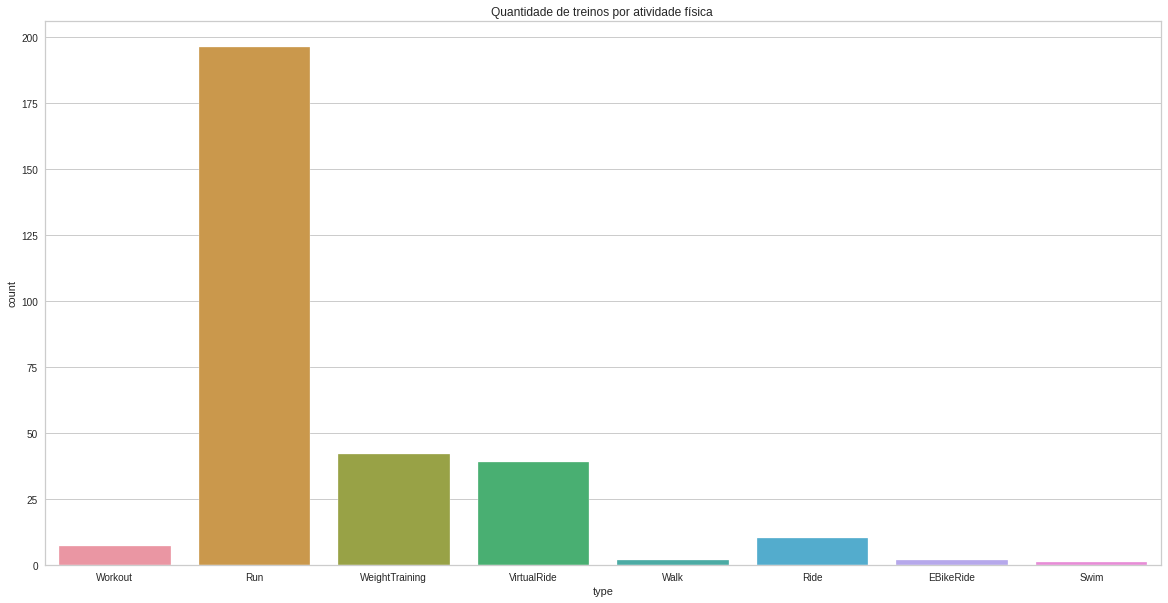

In [539]:
plt.figure( figsize=(20,10))
plt.title("Quantidade de treinos por atividade física ")
sns.countplot(x='type', data=df)
plt.show()


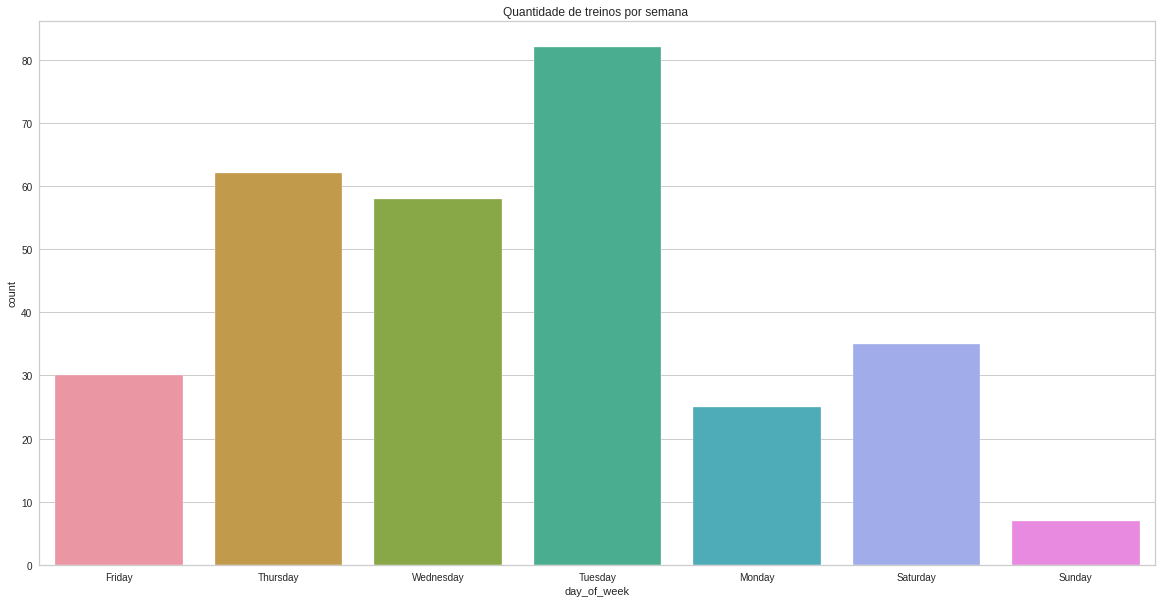

In [540]:
plt.figure( figsize=(20,10))
plt.title("Quantidade de treinos por semana ")
sns.countplot(x='day_of_week', data=df)
plt.show()


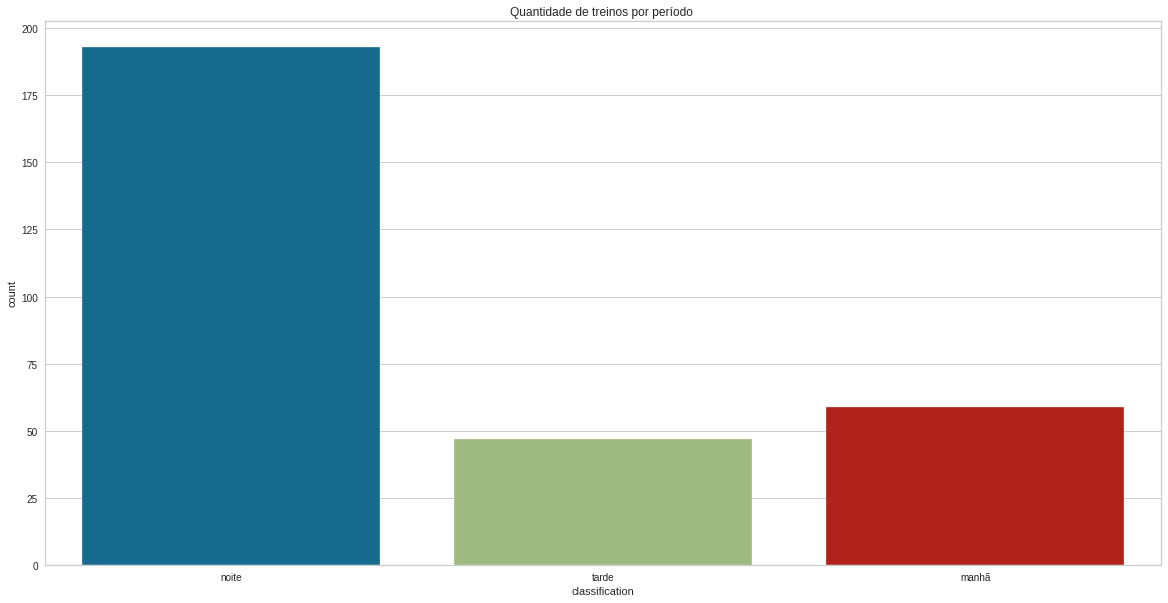

In [541]:
plt.figure( figsize=(20,10))
plt.title("Quantidade de treinos por período ")
sns.countplot(x='classification', data=df)
plt.show()

In [543]:
# Filtro apenas com os treinos de corrida 

df_run = df_run.loc[(df_run['type'] == "Run") & (df_run['distance'] > 0)]
df_run

,type,distance,moving_time,total_elevation_gain,kudos_count,velocidade_média,hora,day_of_week,classification
17,Run,5936.8,54.0,74.1,4,6.6,18:00:31,Tuesday,noite
152,Run,4491.0,34.0,28.7,5,8.0,18:48:38,Thursday,noite
155,Run,5755.0,30.0,57.8,3,11.6,17:37:20,Tuesday,tarde
157,Run,7000.0,50.0,0.0,4,8.3,19:08:04,Tuesday,noite
159,Run,7000.0,46.0,0.0,5,9.1,20:04:47,Thursday,noite
...,...,...,...,...,...,...,...,...,...
294,Run,15000.0,90.0,0.0,2,10.0,13:52:47,Saturday,tarde
295,Run,12000.0,64.0,0.0,2,11.2,19:24:53,Wednesday,noite
296,Run,10000.0,50.0,0.0,2,12.0,20:43:06,Monday,noite
297,Run,9196.4,57.0,162.6,2,9.6,08:15:14,Saturday,manhã


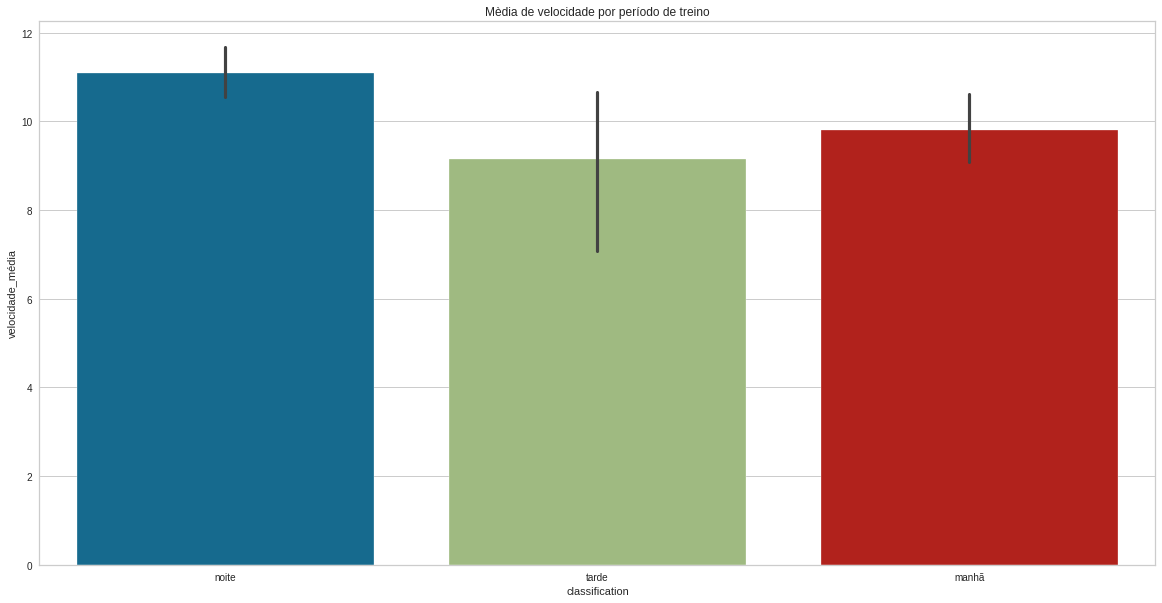

In [544]:
plt.figure( figsize=(20,10))
df_run[['classification', 'velocidade_média' ]].groupby('classification').mean().reset_index()
sns.barplot( x='classification', y='velocidade_média', data=df_run );
plt.title("Mèdia de velocidade por período de treino")
plt.show() 


In [545]:
df 

,type,distance,moving_time,total_elevation_gain,kudos_count,velocidade_média,day_of_week,classification
0,Workout,0.0,60.0,0.0,2,0.0,Friday,noite
1,Workout,0.0,55.0,0.0,2,0.0,Thursday,noite
2,Workout,0.0,47.0,0.0,3,0.0,Wednesday,noite
3,Run,0.0,61.0,0.0,3,0.0,Tuesday,tarde
4,Run,0.0,40.0,0.0,2,0.0,Wednesday,noite
...,...,...,...,...,...,...,...,...
294,Run,15000.0,90.0,0.0,2,10.0,Saturday,tarde
295,Run,12000.0,64.0,0.0,2,11.2,Wednesday,noite
296,Run,10000.0,50.0,0.0,2,12.0,Monday,noite
297,Run,9196.4,57.0,162.6,2,9.6,Saturday,manhã


In [546]:
# Transformando os dados categóricos em númericos

for coluna in df.select_dtypes(exclude=np.number).columns:
    
    print(dict(enumerate(df[coluna].astype("category").cat.categories)))
        
    df[coluna] = df[coluna].astype("category").cat.codes
    
    print("\n\n")

{0: 'EBikeRide', 1: 'Ride', 2: 'Run', 3: 'Swim', 4: 'VirtualRide', 5: 'Walk', 6: 'WeightTraining', 7: 'Workout'}



{0: 'Friday', 1: 'Monday', 2: 'Saturday', 3: 'Sunday', 4: 'Thursday', 5: 'Tuesday', 6: 'Wednesday'}



{0: 'manhã', 1: 'noite', 2: 'tarde'}





In [547]:
# df pronto para modelagem
df

,type,distance,moving_time,total_elevation_gain,kudos_count,velocidade_média,day_of_week,classification
0,7,0.0,60.0,0.0,2,0.0,0,1
1,7,0.0,55.0,0.0,2,0.0,4,1
2,7,0.0,47.0,0.0,3,0.0,6,1
3,2,0.0,61.0,0.0,3,0.0,5,2
4,2,0.0,40.0,0.0,2,0.0,6,1
...,...,...,...,...,...,...,...,...
294,2,15000.0,90.0,0.0,2,10.0,2,2
295,2,12000.0,64.0,0.0,2,11.2,6,1
296,2,10000.0,50.0,0.0,2,12.0,1,1
297,2,9196.4,57.0,162.6,2,9.6,2,0


# Modelagem com o pycaret

In [ ]:
#!pip uninstall imgaug && pip uninstall albumentations && pip install git+https://github.com/aleju/imgaug.git

In [552]:
#!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

In [554]:
# sample 5% of data to be used as unseen data
data = df.sample(frac=0.70, random_state=42)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

# print the revised shape
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (209, 8)
Unseen Data For Predictions: (90, 8)


In [555]:
from pycaret.regression import *

In [556]:
exp_reg101 = setup(data = data, target = 'velocidade_média', session_id=123) 

,Description,Value
0,session_id,123
1,Target,velocidade_média
2,Original Data,"(209, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(146, 17)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='velocidade_média',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [557]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.0447,3.6236,1.7870,0.9069,0.2853,0.1639,0.057
et,Extra Trees Regressor,0.8626,4.0568,1.6980,0.9010,0.1942,0.1716,0.383
ada,AdaBoost Regressor,0.9118,4.2412,1.7758,0.8956,0.1436,0.1961,0.073
rf,Random Forest Regressor,0.8297,4.3675,1.7072,0.8956,0.1406,0.1752,0.415
gbr,Gradient Boosting Regressor,0.8548,4.5357,1.7999,0.8898,0.1604,0.1797,0.047
knn,K Neighbors Regressor,1.2021,6.3998,2.3597,0.8341,0.1998,0.2420,0.069
dt,Decision Tree Regressor,1.0464,7.0616,2.2373,0.8288,0.1856,0.2274,0.017
omp,Orthogonal Matching Pursuit,3.0489,18.0311,4.0763,0.5200,0.8556,0.3671,0.016
par,Passive Aggressive Regressor,2.7006,32.7572,4.9531,0.2002,0.3876,0.5348,0.014
llar,Lasso Least Angle Regression,5.6174,37.6400,6.1116,-0.0655,1.4195,0.5009,0.017


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [558]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2933,0.3587,0.5989,0.9811,0.0555,0.1133
1,0.6167,1.6808,1.2965,0.9564,0.1059,0.1284
2,0.4267,0.5147,0.7174,0.9803,0.0631,0.0699
3,0.7867,2.4760,1.5735,0.9392,0.1041,0.1052
4,0.9067,7.0587,2.6568,0.7847,0.2489,0.1913
5,1.0267,5.5363,2.3529,0.8615,0.1759,0.2012
6,1.8786,16.3764,4.0468,0.6389,0.3436,0.3514
7,2.3786,27.1250,5.2082,0.3920,0.4268,0.5868
8,0.5571,1.0243,1.0121,0.9699,0.0887,0.1258


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [559]:
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


# Tunando o modelo 2.0 com rodas de liga leve

In [562]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2200,0.2740,0.5235,0.9855,0.0464,0.0851
1,0.8133,2.4533,1.5663,0.9363,0.1414,0.1900
2,0.4600,0.6120,0.7823,0.9765,0.0724,0.0765
3,1.5133,11.2870,3.3596,0.7230,0.2267,0.2028
4,0.6033,1.7082,1.3070,0.9479,0.0909,0.1409
5,0.6667,1.9107,1.3823,0.9522,0.0899,0.1023
6,0.5500,1.3525,1.1630,0.9702,0.1232,0.1531
7,1.8643,15.8893,3.9861,0.6439,0.3393,0.4725
8,0.4071,0.6746,0.8214,0.9801,0.0518,0.0765


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [563]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


# Residual Plot

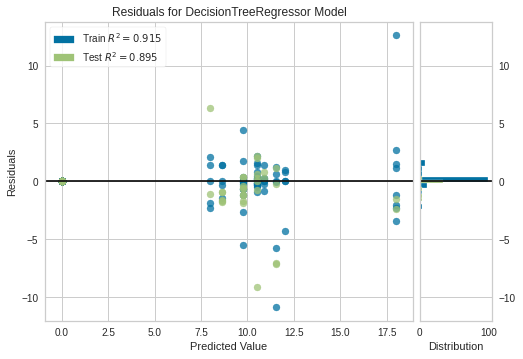

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [564]:
plot_model(tuned_dt)

# Prediction Error Plot

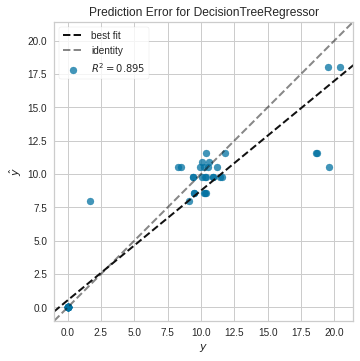

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [565]:
plot_model(tuned_dt, plot = 'error')

# Feature Importance Plot

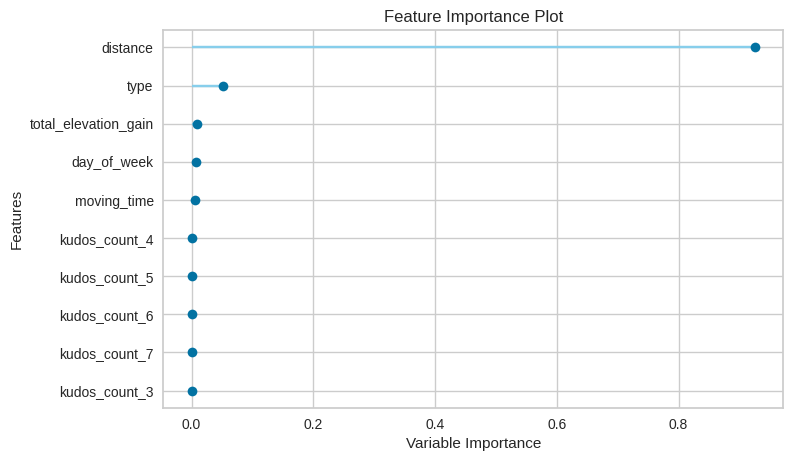

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [566]:
plot_model(tuned_dt, plot='feature')

# Predict on test / hold-out Sample

In [567]:
predict_model(tuned_dt);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.9183,4.2005,2.0495,0.8947,0.1992,0.244


# Finalize Model for Deployment

In [ ]:
final_dt = finalize_model(tuned_dt)

#Predict on unseen data

In [569]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.655,2.9922,1.7298,0.9104,0.2519,0.1503


,type,distance,moving_time,total_elevation_gain,kudos_count,velocidade_média,day_of_week,classification,Label
0,7,0.0,55.0,0.0,2,0.0,4,1,0.0
1,2,0.0,61.0,0.0,3,0.0,5,2,0.0
2,2,0.0,50.0,0.0,3,0.0,6,1,0.0
3,2,0.0,44.0,0.0,3,0.0,5,1,0.0
4,6,0.0,30.0,0.0,4,0.0,0,1,0.0


#  Saving the model

In [572]:
save_model(final_dt,'Final_dt_Model_04ago2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=6,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.002, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), model_name=Final_dt_Model_04ago2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='velocidade_média',
                                      time_features=[])),
                ('imputer',
          

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='velocidade_média',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae',
                                        max_depth=6, max_features=1.0,
                               

# Loading the saved model

In [577]:
saved_final_dt = load_model('Final_dt_Model_04ago2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final_dt_Model_04ago2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [578]:
new_prediction = predict_model(saved_final_dt, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='velocidade_média',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae',
                                       max_de

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.655,2.9922,1.7298,0.9104,0.2519,0.1503


In [586]:
new_prediction.head()

,type,distance,moving_time,total_elevation_gain,kudos_count,velocidade_média,day_of_week,classification,Label
0,7,0.0,55.0,0.0,2,0.0,4,1,0.0
1,2,0.0,61.0,0.0,3,0.0,5,2,0.0
2,2,0.0,50.0,0.0,3,0.0,6,1,0.0
3,2,0.0,44.0,0.0,3,0.0,5,1,0.0
4,6,0.0,30.0,0.0,4,0.0,0,1,0.0
